In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2 * X**6 - 0.5 * X**5 + 2 * X**4 - 5 * X**3 + 3 * X**2 - 10 * X + 5 + noise

    return X, y


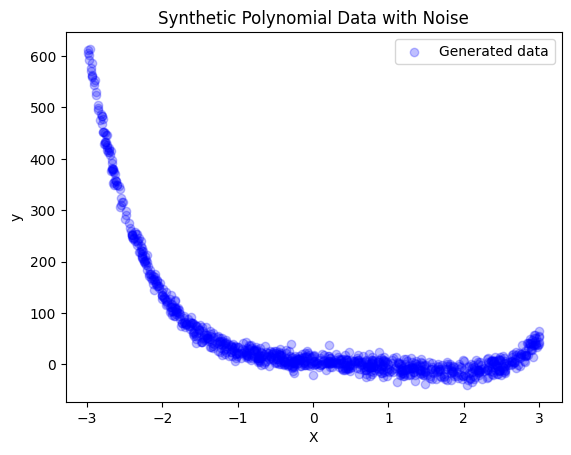

In [ ]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter (or other plots)
plt.scatter(X, y, color='b', alpha=0.25, label='Generated data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Polynomial Data with Noise')
plt.legend()
plt.show()

In [ ]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Generate the out-of-range testing set
X_out, y_out = generate_dataset(5, 7)
_, X_test_out_of_range, _, y_test_out_of_range = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

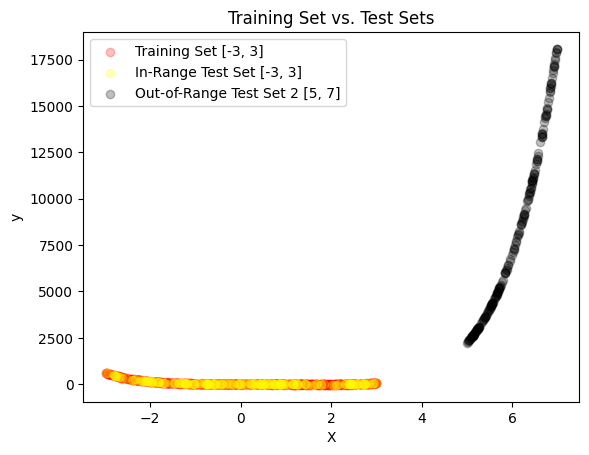

In [ ]:
# TODO: Visualize the sets using scatter (or other plots)
plt.scatter(X_train, y_train, color='red', alpha=0.25, label='Training Set [-3, 3]')
plt.scatter(X_test_in_range, y_test_in_range, color='yellow', alpha=0.25, label='In-Range Test Set [-3, 3]')
plt.scatter(X_test_out_of_range, y_test_out_of_range, color='black', alpha=0.25, label='Out-of-Range Test Set 2 [5, 7]')
plt.legend()
plt.title('Training Set vs. Test Sets')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    features = PolynomialFeatures(degree=degree)
    lr = LinearRegression()

    model = make_pipeline(features, lr)
    model.fit(X.reshape(-1, 1), y)

    return model

In [ ]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for d in range(2, degree + 1):
    models[d] = train_models(X_train, y_train, d)

In [ ]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    # TODO: Calculate MSE of each model (on the input test set).
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        losses[degree] = mean_squared_error(y_test, y_pred)

    return losses

In [ ]:
# TODO: Evaluate models on both the train and the test sets.
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

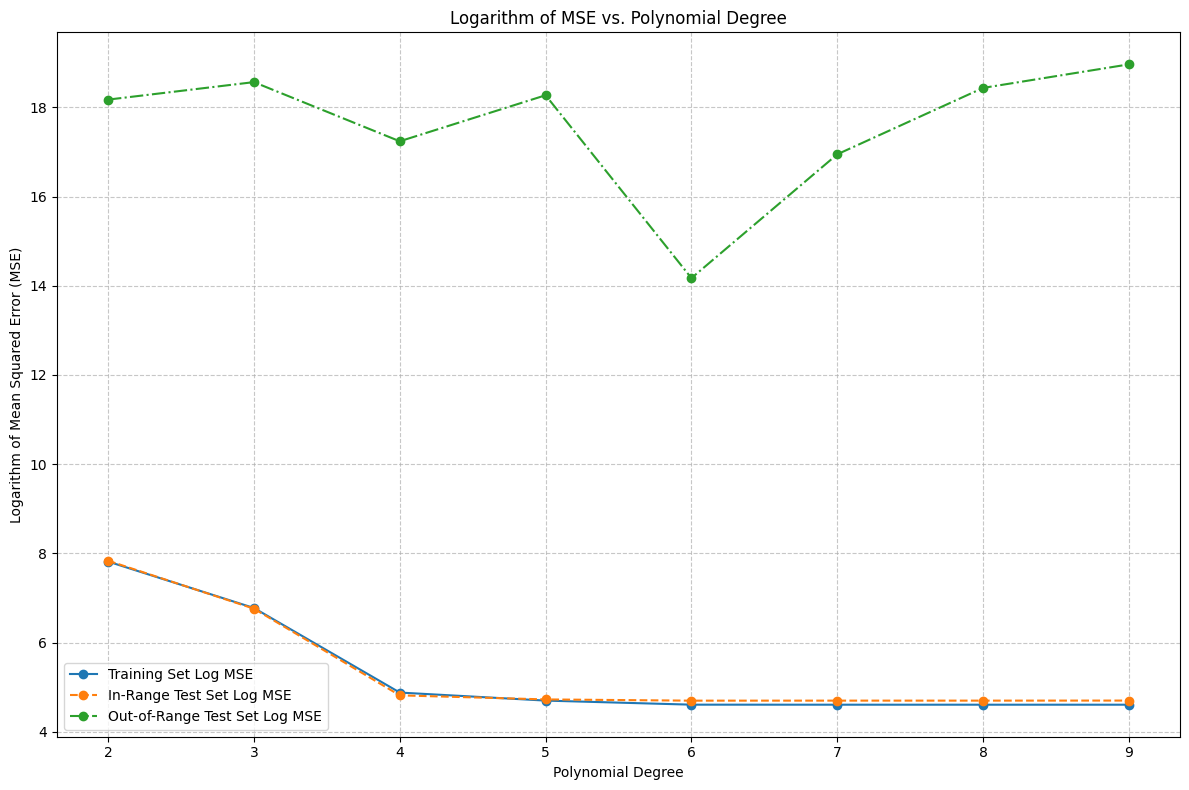

In [ ]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
log_losses_train = np.log1p(list(losses_train.values()))
log_losses_in_range = np.log1p(list(losses_in_range.values()))
log_losses_out_of_range = np.log1p(list(losses_out_of_range.values()))

degrees = range(2, degree + 1)

# TODO: Plot the log MSE results
plt.figure(figsize=(12, 8))
plt.plot(degrees, list(log_losses_train), marker='o', linestyle='-', label='Training Set Log MSE')
plt.plot(degrees, list(log_losses_in_range), marker='o', linestyle='--', label='In-Range Test Set Log MSE')
plt.plot(degrees, list(log_losses_out_of_range), marker='o', linestyle='-.', label='Out-of-Range Test Set Log MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(degrees)
plt.tight_layout()
plt.show()

## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

**The model fits only on training set and doesn't work with the out of range test set.**

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

**Higher-degree polynomials (e.g., degree-9) fit training noise rather than the true trend. While they achieve low MSE on training data, they generalize poorly to new data.**